### Import libraries


In [86]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

### Import Dataset

In [87]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Info dataset

In [88]:
df.shape

(891, 12)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [91]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Valeur null ou pas

In [93]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Remplacement valeur null collne age par la médiane

In [94]:
median = df['Age'].median()
df['Age'].fillna(median, inplace=True)

In [95]:
# Vérife
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Remplacement valeur null colonne Embarkek par S

In [96]:
df["Embarked"].value_counts()
df.Embarked=df["Embarked"].fillna("S")
#verife
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
def dummies(dataset, column):
    dummies = pd.get_dummies(dataset[column],prefix=column)
    dataset = pd.concat([dataset,dummies],axis=1)
    return dataset

In [98]:
df=dummies(df,'Embarked')
# verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Embarked_C   891 non-null    uint8  
 13  Embarked_Q   891 non-null    uint8  
 14  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(5), uint8(3)
memory usage: 86.3+ KB


In [99]:
df=dummies(df,'Sex')
# verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Embarked_C   891 non-null    uint8  
 13  Embarked_Q   891 non-null    uint8  
 14  Embarked_S   891 non-null    uint8  
 15  Sex_female   891 non-null    uint8  
 16  Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(5), object(5), uint8(5)
memory usage: 88.0+ KB


### drop des colonnes

In [100]:
df=df.drop(['PassengerId', 'Name', 'Embarked', 'Cabin', 'Ticket', 'Sex'], axis=1)
#vérif
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


### Création Cible

In [101]:
y=df['Survived']
X=df.drop('Survived',1)

### Standardisation

In [102]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)

### split du dataset pour training

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Arbre de decision

In [104]:
from IPython.display import display
from pprint import pprint

### Creation fonction arbre de décision pour classification

In [105]:
def modelTree(X_train,y_train,X_test,y_test):
    # arbre de decision classification
    clf = DecisionTreeClassifier(random_state=0)
    # training dataset
    clf = clf.fit(X_train,y_train)
    print("max_depth ",clf.tree_.max_depth)
    print("max_features ",clf.max_features_,'\n')
    
    print('The parametres the model used:\n')
    pprint(clf.get_params())
    # parqu'un petit grahp ca fait toujours plaisir
    y_pred = clf.predict(X_test)
    # evalutation model
    model=EvaluateModelRegression(clf,X_test,y_test, y_pred)
    
    return model

### Creation fonction évalutation modéle

In [129]:
def EvaluateModelRegression(model,X_test,y_test, y_predict):
    # Score
    accuracy=accuracy_score(y_test, y_predict)
    print('\n','\033[1m' + 'Accuracy score: '+'\033[0m',accuracy) 
    fig = plt.figure()
    # Matrice de confusion
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test,y_predict), annot=True, ax = ax ,fmt='g'); 
    ax.set_xlabel('Valeurs prédites');ax.set_ylabel('Valeurs réelles'); 
    ax.set_title('Confusion Matrix'); 
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.xaxis.set_ticklabels(['Non_Survivant', 'Survivant']); ax.yaxis.set_ticklabels(['Non_Survivant', 'Survivant']);
    
    return model,accuracy

### import librairie pour Viz

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
from IPython.display import Image  
from sklearn.externals.six import StringIO 
# pour un jolie arbre sur note book
%matplotlib inline
import graphviz 
from sklearn import tree
from sklearn.tree import export_graphviz

### Arbre de classification profondeur, features ect.... avec graphe de corelation

max_depth  15
max_features  10 

The parametres the model used:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

 Accuracy score:  0.7761194029850746


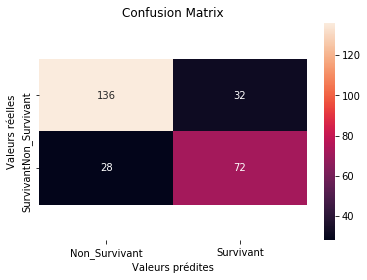

In [122]:
model1,accuracy1= modelTree(X_train,y_train,X_test,y_test)

### Import Viz

In [123]:
import pydot 

### Viz Arbre

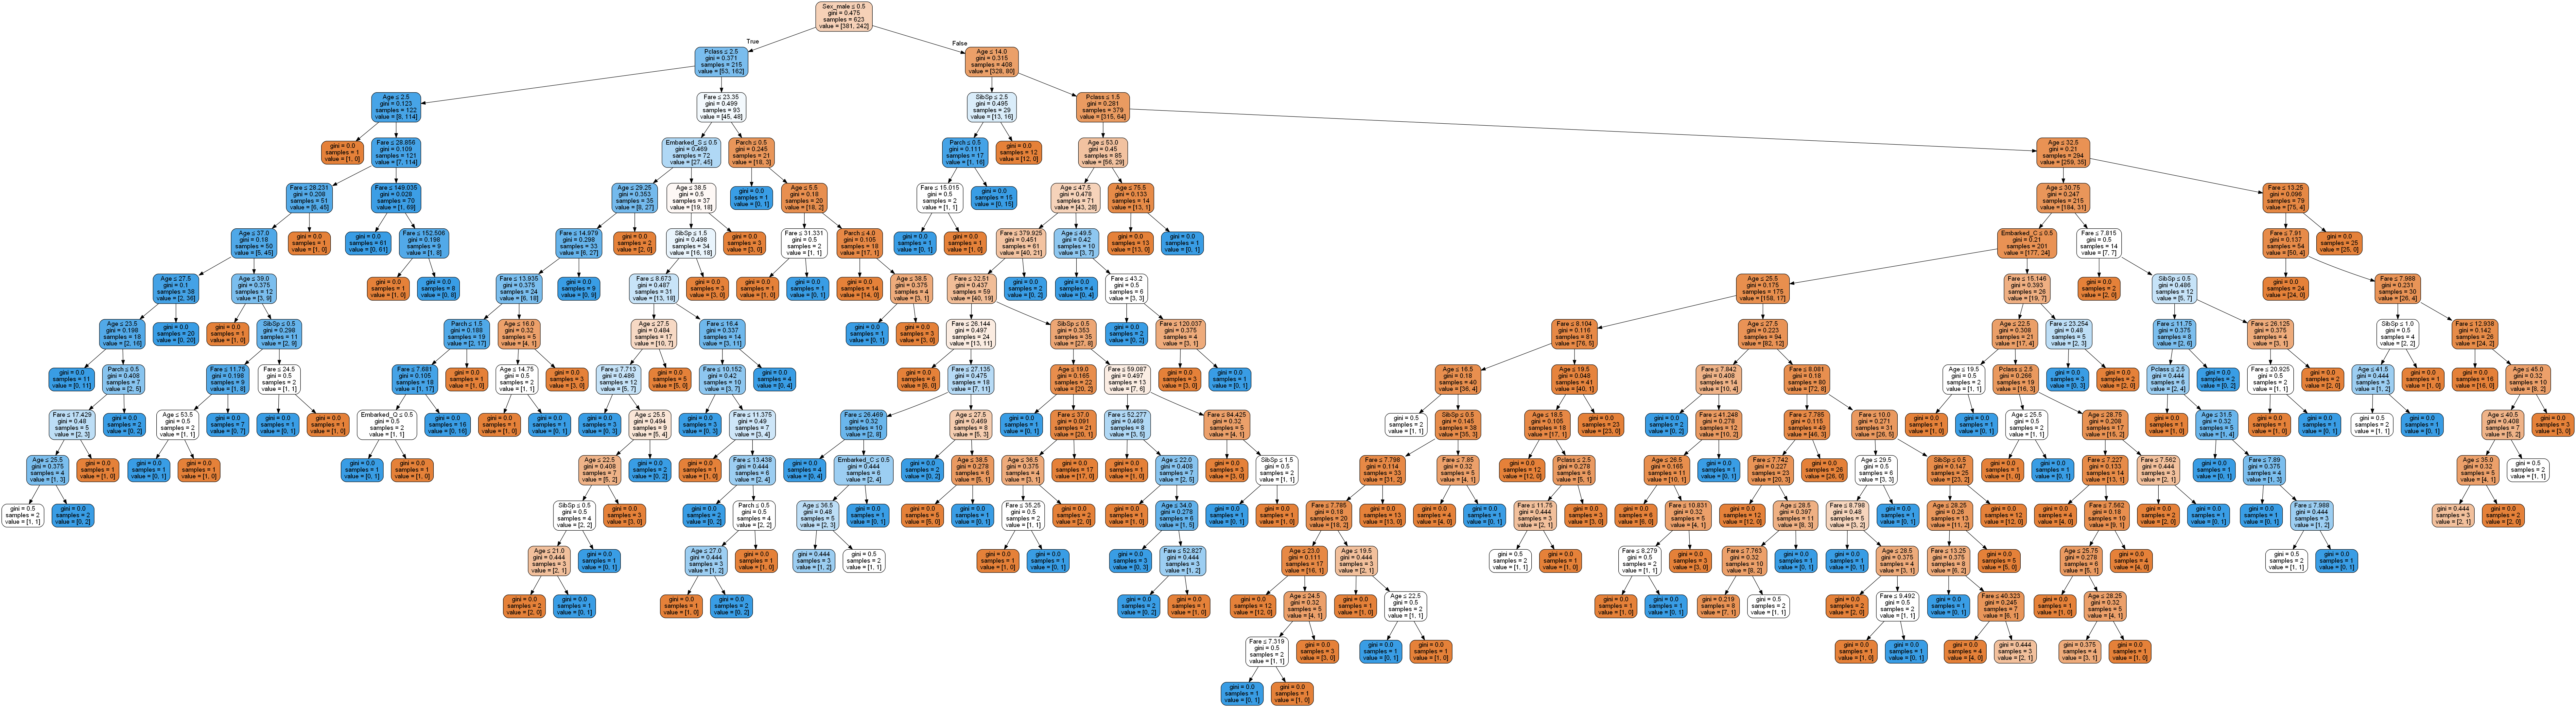

In [124]:
dot_data = StringIO()  
tree.export_graphviz(model1, out_file=dot_data,  
    filled=True, rounded=True,
    feature_names=X_train.columns,
    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

### Optimisation des hyper parametres

#### import librairie

In [146]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score, roc_curve, auc

#### Creation fonction greadsearch

In [169]:
def GridSearchmodel(X, y):
    #cross validation sur dataset
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 0)

    # creation tree classifciation
    classifier = DecisionTreeClassifier()

    # selection parametre 
    params = {'max_depth':range(1, 20),'criterion': ['gini', 'entropy'],'max_features':[1,2,3,4,5,6,7,8,9,10]}
    # Creation Max Search
    grid = GridSearchCV(estimator=classifier, param_grid=params,scoring='accuracy', cv=cv_sets,n_jobs=-1)
    # Fit model
    grid = grid.fit(X, y)
    #Roc
    fpr0, tpr0, thresholds0 = roc_curve(y_test, grid.predict_proba(X_test)[:, 1], drop_intermediate=False)
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    ax.plot([0, 1], [0, 1], 'k--')
    aucf = auc(fpr0, tpr0)
    ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
    ax.set_title('Courbe ROC')
    ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
    ax.legend();
    
   
    
    # Calssification report
    print(classification_report(y_test, grid.predict(X_test)))
    
    
    return grid.best_estimator_

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       168
           1       0.79      0.73      0.76       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

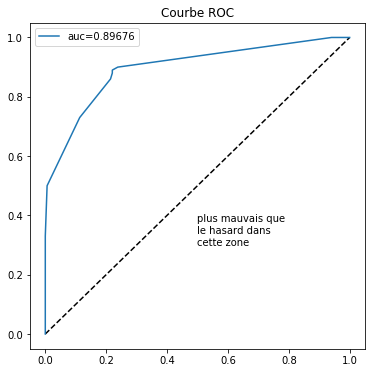

In [170]:
gridModel=GridSearchmodel(X,y)
gridModel


 Accuracy score:  0.8208955223880597


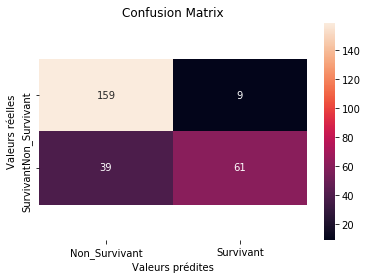

In [171]:
# Utilsiation du model avec gridsearch
gridModel = gridModel.fit(X_train,y_train)

# Viz de l'arbre
# display(graphviz.Source(export_graphviz(gridModel)))
# Prediction
y_pred = gridModel.predict(X_test)
# evaluation model
model2=EvaluateModelRegression(gridModel,X_test,y_test, y_pred)

# On note une amélioration de notre accuracy score de 0.77 à 0.82

In [177]:
 # ne fonctionne pas
    #dot_data = StringIO()  
    #export_graphviz(grid.best_estimator_, out_file=dot_data, feature_names=X_train.columns)  
    #graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    #Image(graph[0].create_png())
dot_data = StringIO()  
tree.export_graphviz(model2, out_file=dot_data,  
    filled=True, rounded=True,
    feature_names=X_test.columns,
    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

TypeError: not all arguments converted during string formatting